# Relatório EP2 MAC0300 - Métodos Numéricos de Álgebra Linear

**nome: Ygor Tavela Alves**

**nUSP: 10687642**


## Introdução

O objetivo deste EP foi implementar algoritmos para resolver de equações lineares, verificando que assim como observado no EP1, a eficiência dos mesmos estão intimamente relacionadas com a forma em que as estruturas de dados são armazenadas na memória por meio da linguagem de programação utilizada.

## Informações Gerais

### Modificações em relação ao cabeçalho das funções apresentadas no enunciado
Para fins de simplificação foram tomados algumas convenções, como:
- usos de ponteiros para vetores e matrizes evitando gastos desnecessários com memória ao alocar espaço de forma estática.

### Arquivos
Na pasta raiz encontra-se o diretório `src/` que contém: 
- *header* e implementação dos algoritmos propostos pelo enunciado do EP (`ep2.c` e `ep2.h`);
- *header* e implementação de funções utilitárias (`util.c` e `util.h`);
- *Makefile* para compilação do programa;
- *scripts bash* (`measurement_cholesky.sh` e `measurement_gaussian.sh`) para testes de execuções dos algoritmos de resolução de sistemas lineares positivos definidos pelo método de decomposição de Cholesky e para sistemas gerais pelo método de eliminação Gaussiana. Os logs dos testes estão armazenados no diretório `time-measurements/`. Vale destacar que é esperado que os arquivos de testes gerados pelos programas `genmat` ou `genmatsim` estejam localizados no diretório `/src/testsfiles`. 

### Compilação do Programa
Como mencionado acima, na pasta `src/` há um ***Makefile*** que pode ser utilizado para compilação do programa, podemos compilar o programa por padrão para *benchmark* de tempo ou especificamente para *debug*. Abaixo listamos as opções para compilação com `make`:
- `make`: compilação padrão do programa gerando executável **ep2** no diretório, o output ao executar o programa serão as medidas de tempo para cada passo da resolução do sistema linear à depender do método escolhido;
- `make debug`: compilação com flag *DEBUG*, o resultado da resolução do sistema linear será exibido na tela;
- `make clean`: apaga objetos e programa.

### Execução do Programa
Para executar o programa, após compilação, utilize o comando `./ep2 #numero_operacao`, sendo #numero_operacao dado por:
1. Resolução de sistemas positivos definidos pelo método de Decomposição de Cholesky por COLUNAS;
2. Resolução de sistemas positivos definidos pelo método de Decomposição de Cholesky por LINHAS;
3. Resolução de sistemas gerais pelo método da Eliminação Gaussiana por COLUNAS;
4. Resolução de sistemas gerais pelo método da Eliminação Gaussiana por LINHAS;

#### Exemplo de execução
Ao gerar os arquivos de testes utilizando os programas `genmat` ou `genmatsim` e escolher o número de operação adequado para o arquivo de teste escolhido, execute o comando abaixo para, por exemplo, resolver o sistema linear positivo definido `a1.dat` utilizando decomposição de Cholesky orientada à colunas:

```
./ep2 1 < a1.dat
```


## Resultados

Os testes realizados neste relatórios foram realizados numa máquina que possui um processador **Intel(R) Core(TM) i5-7200U CPU @ 2.50GHz** com **8GB RAM**.

Conforme sugerido no enunciado do EP, foram feitos testes para problemas de tamanho 100, 200, 300, 400, 500, 600, 700. No entanto, devido à pouca diferença observada entre os tempos de execução dos algoritmos para matrizes com tais ordens de grandeza, foram realizados dois testes adicionais para matrizes de tamanho 1000 e 2000 como forma de complemento à análise.


### Decomposição de Cholesky

O comportamento padrão observado durante os testes deste método foram bem claros em apontar uma diferença em relação à orientação escolhida para percorrer os loops dentro da matriz de coeficientes. Notou-se que a orientação por linhas se mostrou muito mais eficiente se comparada à implementação que utiliza orientação por colunas.

Tal fato, pode ser explicado principalmente devido ao modelo de acesso da memória durante o processamento das operações, que a depender da arquitetura do computador ou, até mesmo, da forma de representação da matriz pela linguagem de programação nesta arquitetura, pode favorecer uma forma ou outra de orientação para percorrer matrizes através dos *loops* do algoritmo.

Esse comportamento pode ser observado na tabela de tempos obtida através dos testes realizados:

**Orientação por colunas**:

In [1]:
import pandas as pd

cholesky_by_column_data = pd.read_csv('./src/time-measurements/cholesky_by_column.csv')
print(cholesky_by_column_data)

   size  chol_time  forw_time  back_time
0   100   0.000783   0.000018   0.000018
1   200   0.007003   0.000104   0.000074
2   300   0.023049   0.000179   0.000175
3   400   0.058403   0.000338   0.000319
4   500   0.120221   0.000888   0.000623
5   600   0.213515   0.000942   0.000808
6   700   0.341391   0.001704   0.001434
7  1000   1.173400   0.003781   0.003384
8  2000  14.757560   0.018464   0.018313


**Orientação por linhas**:

In [2]:
cholesky_by_row_data = pd.read_csv('./src/time-measurements/cholesky_by_row.csv')
print(cholesky_by_row_data)

   size  chol_time  forw_time  back_time
0   100   0.000775   0.000017   0.000017
1   200   0.007988   0.000126   0.000126
2   300   0.020179   0.000147   0.000161
3   400   0.047474   0.000259   0.000287
4   500   0.092434   0.000412   0.000411
5   600   0.180805   0.000581   0.000597
6   700   0.253603   0.000799   0.000820
7  1000   0.752043   0.001710   0.001783
8  2000   6.141079   0.006851   0.007088


**Gráfico tamanho de entrada x tempo de execução total do algoritmo**:

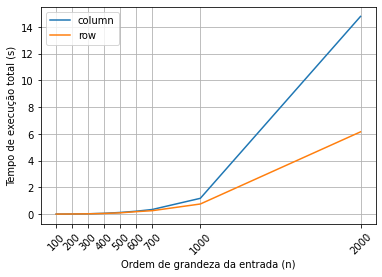

In [3]:
import matplotlib.pyplot as plt

figure = plt.figure()
plt.grid(True)
plt.xlabel('Ordem de grandeza da entrada (n)')
plt.ylabel('Tempo de execução total (s)')
plt.xticks(cholesky_by_column_data['size'], rotation=45)

plt.plot(cholesky_by_column_data['size'], cholesky_by_column_data['chol_time'] + cholesky_by_column_data['forw_time'] + cholesky_by_column_data['back_time'] )
plt.plot(cholesky_by_row_data['size'], cholesky_by_row_data['chol_time'] + cholesky_by_row_data['forw_time'] + cholesky_by_row_data['back_time'])
plt.legend(['column', 'row'])

plt.show()

Analisando o gráfico acima, nota-se que a influência do tempo de acesso à memória sobre o tempo de execução final se torna cada vez mais aparente conforme a ordem de grandeza da entrada aumenta.

### Eliminação Gaussiana

De forma análoga ao algoritmo de decomposição de Cholesky, observamos o mesmo impacto referente à orientação em que as matrizes são acessadas na memória. Ademais, apesar de ambos algoritmos possuirem tempo de execução assíntotico da ordem de $\mathcal{O}(n^3)$, durante os testes de execução da eliminação Gaussina, foi observado que a constante associada ao tempo de execução se mostrou maior. Podemos observar tais efeitos, à partir das tabelas com os registros de tempos em cada passo do algoritmo e um gráfico que relaciona o tamanho da entrada com o respectivo tempo total de execução do algoritmo apresentadas abaixo.

**Orientação por colunas**:

In [4]:
gaussian_by_column_data = pd.read_csv('./src/time-measurements/gaussian_by_column.csv')
print(gaussian_by_column_data)

   size    lu_time   ss_time
0   100   0.003229  0.000068
1   200   0.014599  0.000172
2   300   0.048270  0.000369
3   400   0.119665  0.000697
4   500   0.288004  0.001489
5   600   0.478910  0.002149
6   700   0.775482  0.003063
7  1000   3.013753  0.006860
8  2000  34.197951  0.035130


**Orientação por linhas**:

In [5]:
gaussian_by_row_data = pd.read_csv('./src/time-measurements/gaussian_by_row.csv')
print(gaussian_by_row_data)

   size    lu_time   ss_time
0   100   0.001616  0.000034
1   200   0.013365  0.000170
2   300   0.043123  0.000297
3   400   0.101691  0.000532
4   500   0.203892  0.000921
5   600   0.345362  0.001259
6   700   0.549915  0.001733
7  1000   1.631661  0.003565
8  2000  13.150688  0.014017


**Gráfico tamanho de entrada x tempo de execução total do algoritmo**:

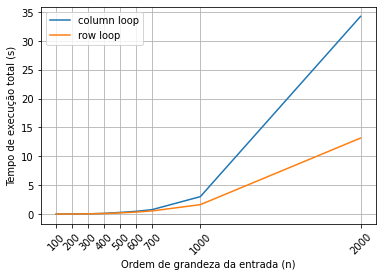

In [6]:
plt.close()
figure = plt.figure()
plt.grid(True)
plt.xlabel('Ordem de grandeza da entrada (n)')
plt.ylabel('Tempo de execução total (s)')
plt.xticks(gaussian_by_column_data['size'], rotation=45)

plt.plot(gaussian_by_column_data['size'], gaussian_by_column_data['lu_time'] + gaussian_by_column_data['ss_time'])
plt.plot(gaussian_by_row_data['size'], gaussian_by_row_data['lu_time'] + gaussian_by_row_data['ss_time'])
plt.legend(['column loop', 'row loop'])

plt.show()

No gráfico acima, é possível confirmar o que foi dito acima. Além disso, apesar da semelhança entre as curvas observadas acima e no gráfico referente ao método de decomposição de Cholesky, pode-se notar que o tempo de execução para o método de eliminação Gaussiana se mostrou mais lento que o método de decomposição de Cholesky numa proporção em torno de 2.

Podemos ver na tabela abaixo a diferença relativa entre o tempo de execução do total de ambos os algoritmos seguindo orientação por linhas para os diferentes tamanhos de entrada testados.

In [7]:
print((gaussian_by_row_data['lu_time'] + gaussian_by_row_data['ss_time'])/(cholesky_by_row_data['chol_time'] + cholesky_by_row_data['forw_time'] + cholesky_by_row_data['back_time']))

0    2.039555
1    1.642597
2    2.119393
3    2.128759
4    2.196221
5    1.904689
6    2.161444
7    2.164326
8    2.138857
dtype: float64
